# Weekly Activity (Tutorial 9)

## Directory

In [1]:
import os 
os.chdir("C:/Users/yichu/Desktop/yichun/UTAR/Y2S3/Mini Project/Week 9")

In [2]:
%pwd

'C:\\Users\\yichu\\Desktop\\yichun\\UTAR\\Y2S3\\Mini Project\\Week 9'

## Setup

In [3]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility,
np.random.seed(99)

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

### Activity 1
Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.

#### Hough Transform 

In [23]:
img = cv.imread("coins_1.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)

# Hough Circle Transform
row = gray.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150,
                        param2 = 25)

# plot all the circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # Center
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 100, 255), 3)
        
        # Radius
        radius = i[2]
        
        # Plot whole circle
        cv.circle(img, center, radius, (255, 0, 0), 2)
        
img_hough = img
        
cv.imshow("Result", img_hough)
cv.waitKey(0)
cv.destroyAllWindows()

#### Blob Detection

In [24]:
img = cv.imread('coins_1.jfif')
blur = cv.medianBlur(img, 5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# Set up the parameters
params = cv.SimpleBlobDetector_Params()

# To get as many blobs as possible : turn off all filters
params.filterByArea = True
params.filterByConvexity = False     # it will not be >1 because either flat or curve outwards
params.filterByInertia = False       # more circular, ratio closer to 1, more elongated, raito closer to 0
params.filterByCircularity = True
params.filterByColor = False         

# create object detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw detected blobs as red circles
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0, 0, 255), 
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('Blob detection', im_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

In [25]:
cv.imshow('Comparison: Original, Hough Transform, Blob Detection', np.hstack((img, img_hough, im_with_keypoints)))
cv.waitKey(0)
cv.destroyAllWindows()

### Comment
Blob detection has better detection compared to Hough Transform

### Activity 2
Apply k-means clustering on 'zebra.jfif' to segment out the zebra.
- You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
- Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

### RGB

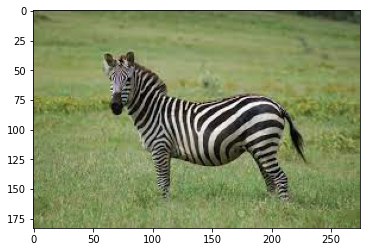

In [4]:
img = cv.imread('zebra.jfif')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img_rgb)
plt.show()

In [5]:
img.shape

(183, 275, 3)

In [6]:
# For k-means clustering, reshape the image to be a list of pixels
img_reshape = img_rgb.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

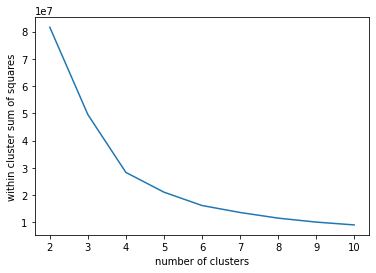

In [7]:
# To determine the optimal k

findOptimalK = [] 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 11): 
    ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    findOptimalK.append(ret)

plt.plot(range(2, 11), findOptimalK)
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of squares') 
plt.show()

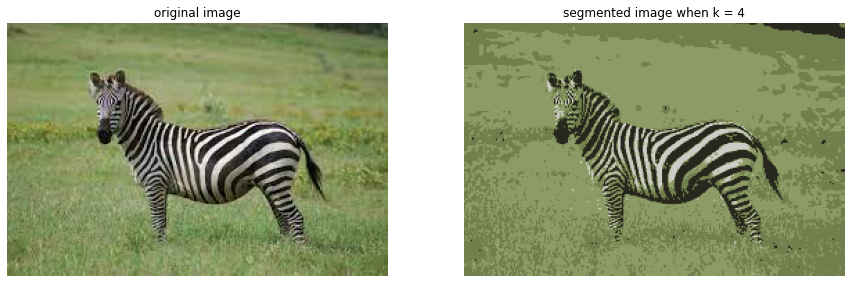

In [8]:
#2: perform k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4       # Optimal K
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

#3: Visualize
center = np.uint8(center)
res = center[label.flatten()]       # 3D --> 2D
seg_res = res.reshape(img_rgb.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.title('original image'), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(seg_res)
plt.title(f"segmented image when k = {K}"), plt.axis("off")
plt.show()

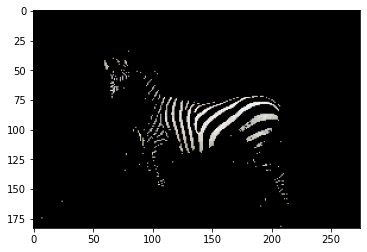

In [9]:
# extract the white area of the zebra
from numpy import linalg as LN

# Find which center is nearest to white colour
white_color = (255, 255, 255)

idx = np.argmin(LN.norm(white_color - center, axis = 1))

# mask
zebra_mask = seg_res == center[idx]
seg_result = img_rgb*(zebra_mask.astype('uint8'))

plt.imshow(seg_result)
plt.show()

### HSV

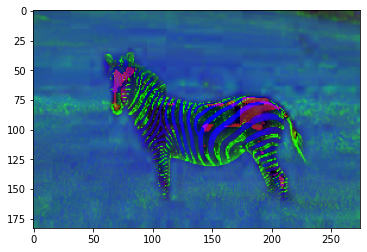

In [17]:
img = cv.imread('zebra.jfif')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img_hsv)
plt.show()

In [18]:
img.shape

(183, 275, 3)

In [19]:
# For k-means clustering, reshape the image to be a list of pixels
img_reshape = img_hsv.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

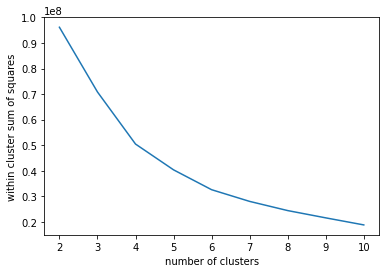

In [20]:
# To determine the optimal k

findOptimalK = [] 
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10

for k in range(2, 11): 
    ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, cv.KMEANS_PP_CENTERS)
    findOptimalK.append(ret)

plt.plot(range(2, 11), findOptimalK)
plt.xlabel('number of clusters')
plt.ylabel('within cluster sum of squares') 
plt.show()

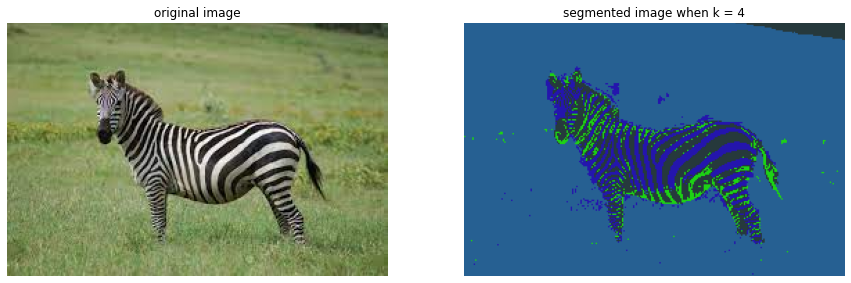

In [21]:
# perform k-means clustering
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4       # Optimal K
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_PP_CENTERS)

# Visualize
center = np.uint8(center)
res = center[label.flatten()]       # 3D --> 2D
seg_res = res.reshape(img_hsv.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1), plt.imshow(img_rgb)
plt.title('original image'), plt.axis("off")
plt.subplot(1, 2, 2), plt.imshow(seg_res)
plt.title(f"segmented image when k = {K}"), plt.axis("off")
plt.show()

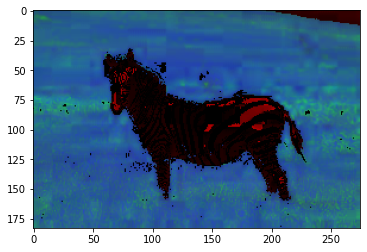

In [22]:
# extract the white area of the zebra
from numpy import linalg as LN

# Find which center is nearest to white colour
white_color = (255, 255, 255)

idx = np.argmin(LN.norm(white_color - center, axis = 1))

# mask
zebra_mask = seg_res == center[idx]
seg_result = img_hsv*(zebra_mask.astype('uint8'))

plt.imshow(seg_result)
plt.show()

### Comment
By comparision, RGB has better image segemntation result because HSV has more holes to be filled as shown above.